# Correlation between air pollution and temperature

The first thing I have to do is generate the dataset described below:

There are 24 5x5 arrays. 12 are air pollution and 12 are temperature, for each month of the year. The 5x5 setup represents a grid centered around the factory. Measurements have been taken around that central location as required. (They just weren't looked at before since they had been modified to be below threshold levels). We're going to pretend that the pollution is heavy and doesn't travel far. So we're going to make the 3x3 grid in the center the only stuff worth looking at. Finally, since we're looking at temperature over the course of a year, players are going to have to normalize for the average temperature each month.  

In [174]:
import numpy as np

In [175]:
pollution = np.random.rand(12,5,5)
temperature = np.random.rand(12,5,5)

Now we have to transform the middle of the datasets so there's a trend.

In [176]:
#How to properly do indexing
print pollution[0]
print ''
print pollution[0, 1:4, 1:4]

[[ 0.91608889  0.3845743   0.807517    0.41360055  0.86404671]
 [ 0.55301463  0.76257572  0.08726591  0.36804189  0.55195536]
 [ 0.08893268  0.99645329  0.88289318  0.21505927  0.07413818]
 [ 0.91908637  0.6512863   0.43145571  0.03790161  0.45285745]
 [ 0.11341382  0.54559943  0.07856832  0.53875787  0.56916654]]

[[ 0.76257572  0.08726591  0.36804189]
 [ 0.99645329  0.88289318  0.21505927]
 [ 0.6512863   0.43145571  0.03790161]]


In [177]:
poll_means = []
for i in range(12):
    print i
    print pollution[i, 1:4, 1:4]
    pollution[i, 1:4, 1:4] *= i+1
    print ''
    print pollution[i, 1:4, 1:4] 
    poll_means.append(np.mean(pollution[i, 1:4, 1:4]))
    print np.mean(pollution[i, 1:4, 1:4])

0
[[ 0.76257572  0.08726591  0.36804189]
 [ 0.99645329  0.88289318  0.21505927]
 [ 0.6512863   0.43145571  0.03790161]]

[[ 0.76257572  0.08726591  0.36804189]
 [ 0.99645329  0.88289318  0.21505927]
 [ 0.6512863   0.43145571  0.03790161]]
0.492548096465
1
[[ 0.31262715  0.24031817  0.4662806 ]
 [ 0.77915322  0.7532051   0.96863939]
 [ 0.74867392  0.4280218   0.66342265]]

[[ 0.6252543   0.48063635  0.9325612 ]
 [ 1.55830643  1.50641021  1.93727878]
 [ 1.49734784  0.8560436   1.32684531]]
1.19118711379
2
[[ 0.80646817  0.44991478  0.02828211]
 [ 0.14163093  0.85189377  0.51662442]
 [ 0.71688517  0.38525081  0.33182141]]

[[ 2.4194045   1.34974434  0.08484632]
 [ 0.4248928   2.55568132  1.54987326]
 [ 2.15065551  1.15575244  0.99546423]]
1.40959052477
3
[[ 0.29520998  0.16526038  0.52769653]
 [ 0.50847252  0.59445457  0.81458907]
 [ 0.33253627  0.66158302  0.12191847]]

[[ 1.18083994  0.6610415   2.11078611]
 [ 2.03389007  2.37781828  3.2583563 ]
 [ 1.33014507  2.6463321   0.48767389]]
1

In [178]:
print pollution[11]
print ''
print pollution[11, 1:4, 1:4]

[[  0.46377734   0.65581593   0.13297885   0.09504097   0.61297467]
 [  0.07655387   1.89053705  11.79586093   3.59216585   0.19752596]
 [  0.59415642   9.39905801   1.99017721   5.0899231    0.91668988]
 [  0.50989698  11.87263329   2.57060848   2.47616563   0.66069058]
 [  0.60831502   0.85588396   0.48329772   0.94219667   0.60539893]]

[[  1.89053705  11.79586093   3.59216585]
 [  9.39905801   1.99017721   5.0899231 ]
 [ 11.87263329   2.57060848   2.47616563]]


In [179]:
monthly_temps = [42,44,53,64,75,83,87,84,78,67,55,45]

The temperature transformation is going to be slightly more complicated, but still pretty straightforward.

In [180]:
temp_means = []
for i in range(12):
    print i
    print temperature[i, 1:4, 1:4]
    print ''
    temperature[i, 1:4, 1:4] *= i+1
    print temperature[i, 1:4, 1:4]
    print ''
    temperature[i, 1:4, 1:4] += monthly_temps[i] + np.random.randint(-3,3,1)
    print temperature[i, 1:4, 1:4]
    temp_means.append(np.mean(temperature[i, 1:4, 1:4]))
    print np.mean(temperature[i, 1:4, 1:4])

0
[[ 0.45456182  0.19259153  0.9227368 ]
 [ 0.43255094  0.85808925  0.99022096]
 [ 0.82817026  0.06166898  0.44514559]]

[[ 0.45456182  0.19259153  0.9227368 ]
 [ 0.43255094  0.85808925  0.99022096]
 [ 0.82817026  0.06166898  0.44514559]]

[[ 41.45456182  41.19259153  41.9227368 ]
 [ 41.43255094  41.85808925  41.99022096]
 [ 41.82817026  41.06166898  41.44514559]]
41.5761929029
1
[[ 0.82280252  0.59088573  0.57526073]
 [ 0.27186571  0.91987076  0.96431152]
 [ 0.26534412  0.69398122  0.71733997]]

[[ 1.64560505  1.18177146  1.15052147]
 [ 0.54373142  1.83974152  1.92862305]
 [ 0.53068825  1.38796244  1.43467994]]

[[ 42.64560505  42.18177146  42.15052147]
 [ 41.54373142  42.83974152  42.92862305]
 [ 41.53068825  42.38796244  42.43467994]]
42.2937027313
2
[[ 0.39301711  0.75849033  0.21079018]
 [ 0.23973344  0.44190644  0.44982079]
 [ 0.14059867  0.2825989   0.29596182]]

[[ 1.17905134  2.27547098  0.63237055]
 [ 0.71920032  1.32571931  1.34946238]
 [ 0.421796    0.84779671  0.88788545]]

Let's plot the values and see how they relate.

In [181]:
import matplotlib.pyplot as plt

In [182]:
%matplotlib inline

In [183]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 9.0] #Larger than default of 6, 4
colors = plt.rcParams['axes.color_cycle']

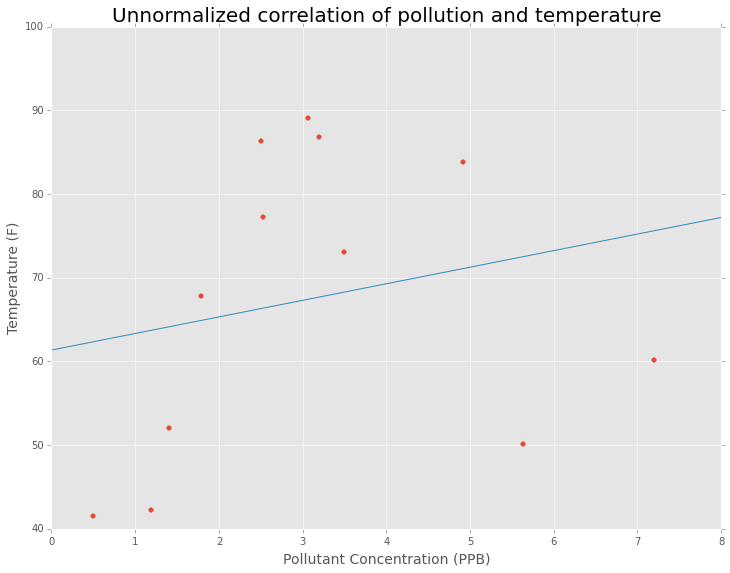

In [184]:
p, res, _, _, _ = np.polyfit(poll_means, temp_means, 1, full=True)
x_line = np.linspace(0,10, 100)
yfit = np.polyval(p,x_line)

plt.scatter(poll_means, temp_means, color=colors[0])
plt.plot(x_line, yfit, color=colors[1])
plt.title('Unnormalized correlation of pollution and temperature', fontsize=20)
plt.ylabel('Temperature (F)', fontsize=14)
plt.ylim([40,100])
plt.xlabel('Pollutant Concentration (PPB)', fontsize=14)
plt.xlim([0,8])
plt.show()

What's the correlation here?

In [185]:
from scipy.stats import linregress

In [186]:
slope, intercept, r_value, p_value, std_err = linregress(poll_means, temp_means)

In [187]:
print 'R^2:', r_value**2
print 'p-value:', p_value

R^2: 0.047698492382
p-value: 0.495279176291


Now what happens if we remember to normalize to the changin' o' da seasons?

In [188]:
temp_means_norm = [t/m for t,m in zip(temp_means, monthly_temps)]

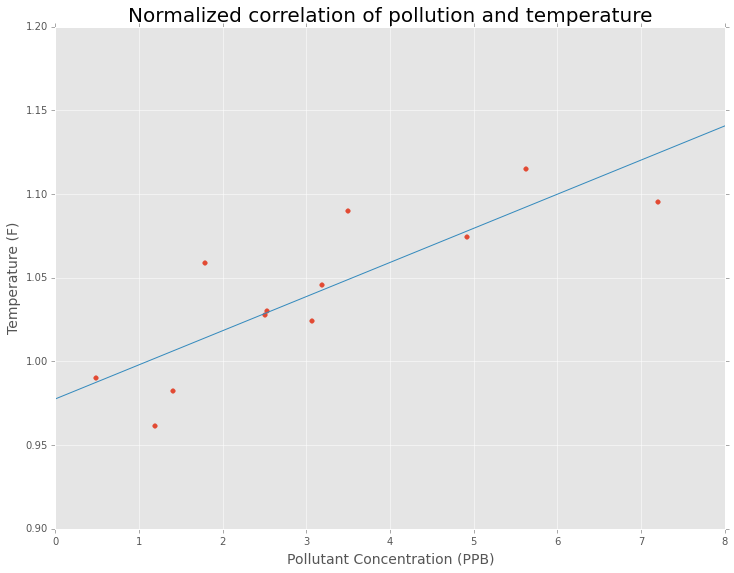

In [189]:
p, res, _, _, _ = np.polyfit(poll_means, temp_means_norm, 1, full=True)
x_line = np.linspace(0,10, 100)
yfit = np.polyval(p,x_line)

plt.scatter(poll_means, temp_means_norm, color=colors[0])
plt.plot(x_line, yfit, color=colors[1])
plt.title('Normalized correlation of pollution and temperature', fontsize=20)
plt.ylabel('Temperature (F)', fontsize=14)
#plt.ylim([40,100])
plt.xlabel('Pollutant Concentration (PPB)', fontsize=14)
plt.xlim([0,8])
plt.show()

In [190]:
slope, intercept, r_value, p_value, std_err = linregress(poll_means, temp_means_norm)
print 'R^2:', r_value**2
print 'p-value:', p_value

R^2: 0.698866643671
p-value: 0.000704912529314


Perfect. As expected, if you normalize for the average monthly temperature, there's a statistcially significant correlation. 

I think I'm going so save this as both a set of csv files and as a numpy file, so players can choose.

In [191]:
np.save('/home/jessime/Code/Excision/data/temperature.npy', temperature)
np.save('/home/jessime/Code/Excision/data/pollution.npy', pollution)

In [192]:
for i in range(12):
    np.savetxt('/home/jessime/Code/Excision/data/temperature_{}.csv'.format(i), temperature[i], delimiter=',')
    np.savetxt('/home/jessime/Code/Excision/data/pollution_{}.csv'.format(i), pollution[i], delimiter=',')

# Solution

What's the perfect way that a player could answer this question?

In [194]:
#Get data
temperature = np.load('/home/jessime/Code/Excision/data/temperature.npy')
pollution = np.load('/home/jessime/Code/Excision/data/pollution.npy')

#Players will have to look at a few of the months to get the range of the pollution. There will be clues.
temp_avg = [np.mean(month[1:4,1:4]) for month in temperature]
poll_avg = [np.mean(month[1:4,1:4]) for month in pollution]

#The players will also have to correct for the average monthly temperature. This won't be known immediately.
temp_avg_norm = [t/m for t,m in zip(temp_means, monthly_temps)]

slope, intercept, r_value, p_value, std_err = linregress(poll_means, temp_means_norm)
print 'p-value:', p_value

p-value: 0.000704912529314


Notice that it matches the p-value above.